**Exercise session 6 - Part 1**

In this lab we will use the variables $dis$ (the weighted mean of distances
to five Boston employment centers) and $nox$ (nitrogen oxides concentration
in parts per 10 million) from the Boston data. We will treat
$dis$ as the predictor and $nox$ as the response.

In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

from patsy import dmatrix

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_boston
boston_dict = load_boston()
boston_dict.keys()
# print(boston_dict)

/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [3]:
boston = pd.DataFrame(boston_dict['data'],columns=boston_dict['feature_names'])
print(boston.shape)
boston.head()

(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


<AxesSubplot: xlabel='DIS', ylabel='NOX'>

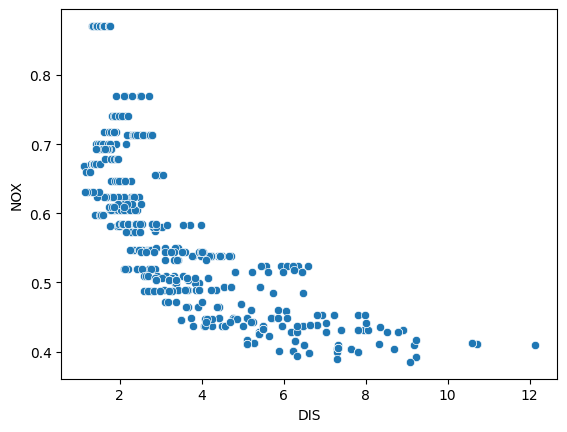

In [4]:
X = boston['DIS']
y = boston['NOX']

sns.scatterplot(x=X,y=y)

* Use the poly() function to fit a cubic polynomial regression to
predict $nox$ using $dis$.

mean squared error is  0.003822345271104883


<AxesSubplot: xlabel='DIS', ylabel='NOX'>

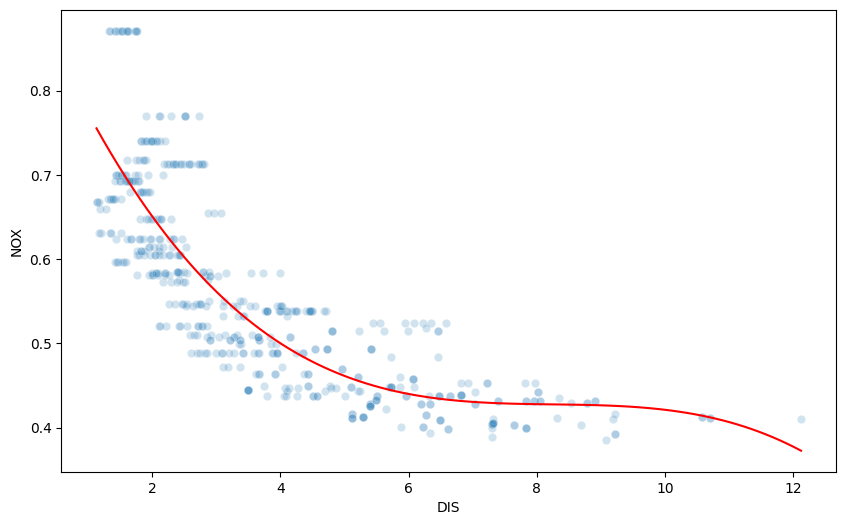

In [5]:
poly = PolynomialFeatures(3,include_bias=False)
X_poly = poly.fit_transform(X.to_frame())

lr = LinearRegression()
lr.fit(X_poly,y)

preds = lr.predict(X_poly)
mse = mean_squared_error(y,preds)
print('mean squared error is ',mse)

X_test = np.linspace(min(X),max(X),100)
X_test_poly = poly.fit_transform(X_test.reshape(-1,1))
preds_test = lr.predict(X_test_poly)

plt.figure(figsize = (10,6))
sns.scatterplot(x=X,y=y,alpha = 0.2)
sns.lineplot(x=X_test,y=preds_test,color = 'r')

* Plot the polynomial fits for a range of different polynomial
degrees

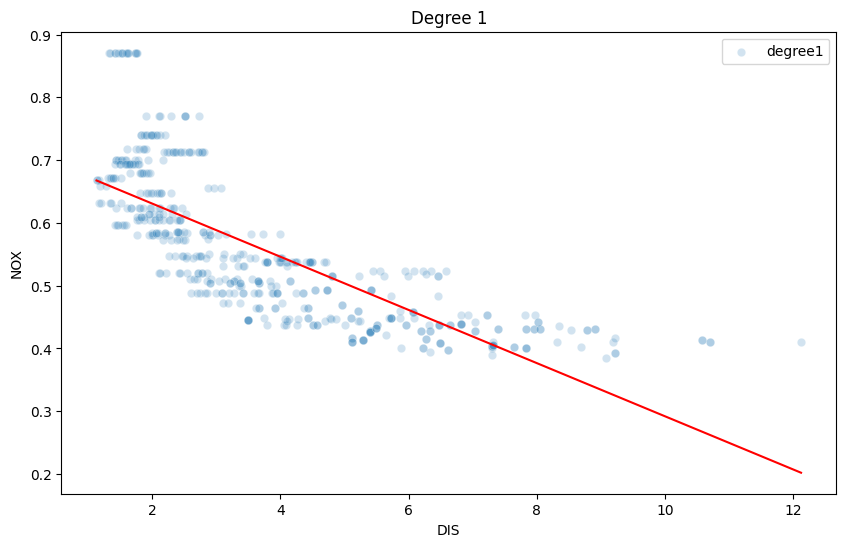

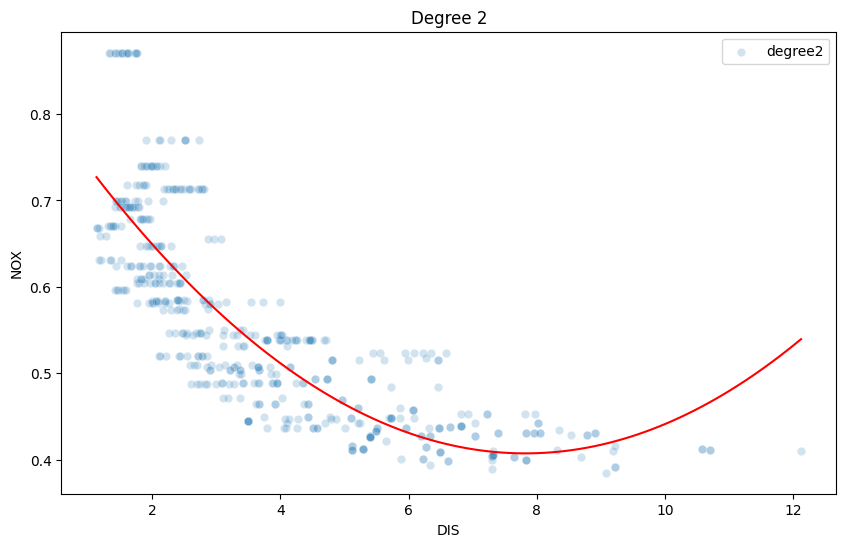

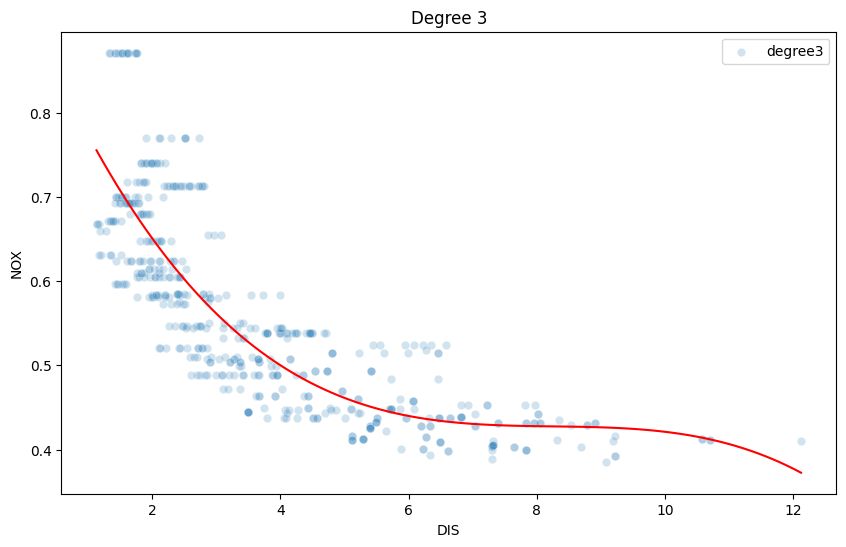

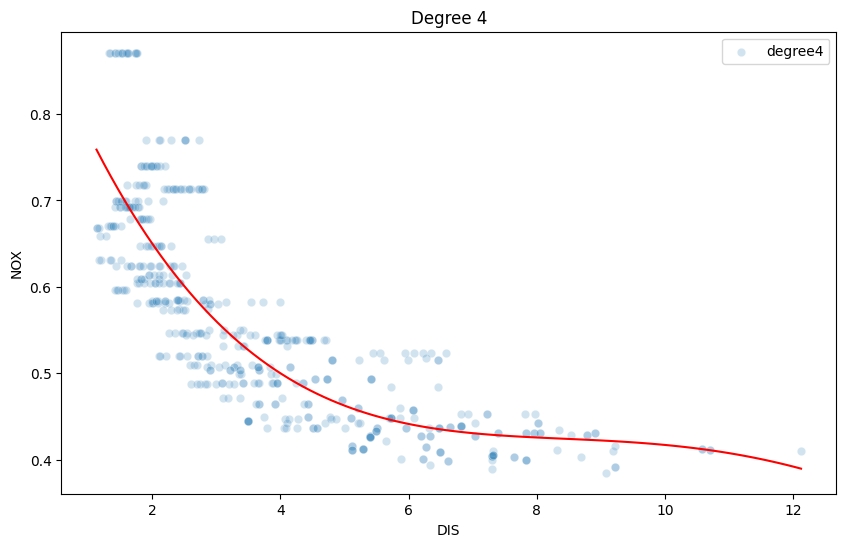

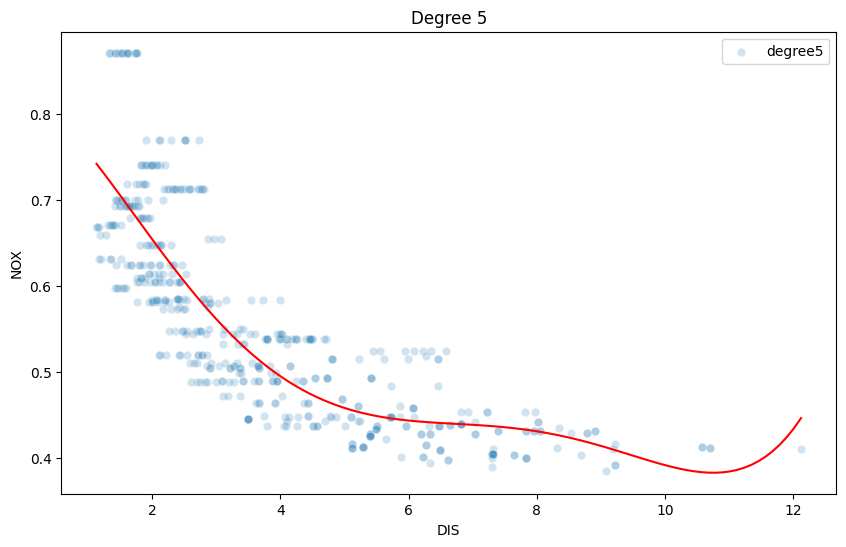

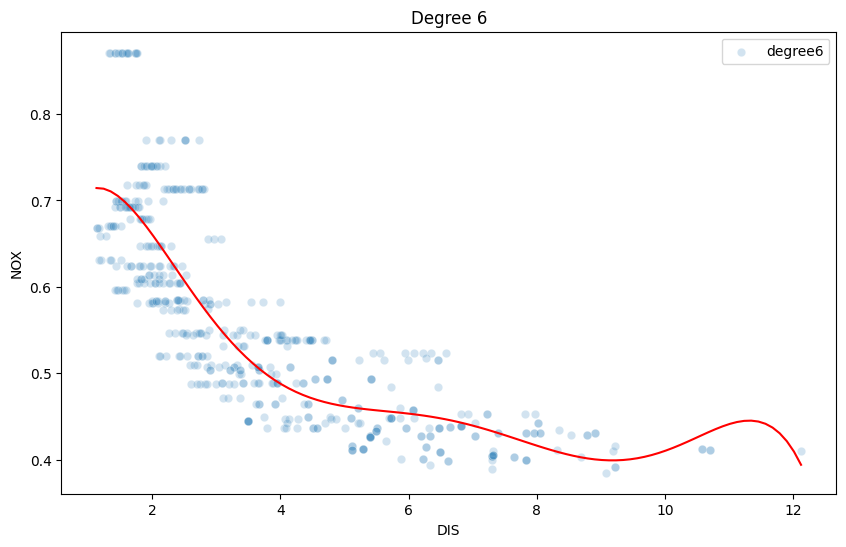

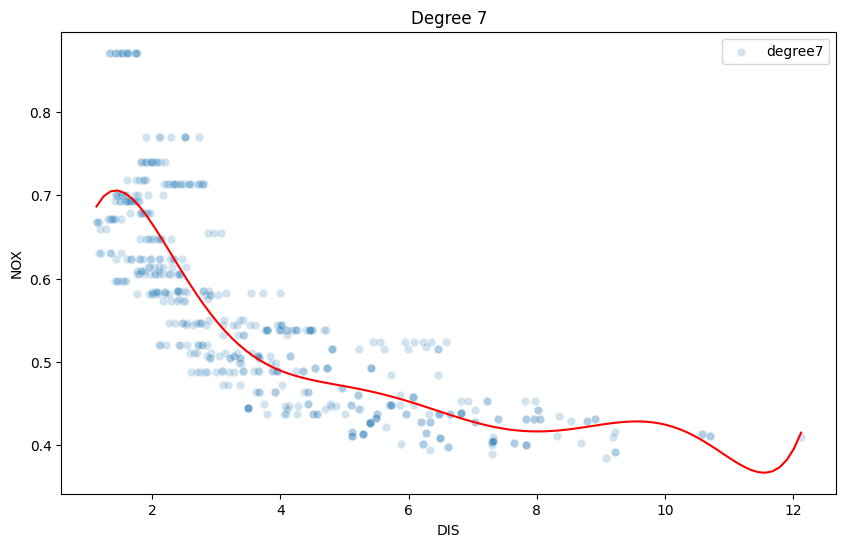

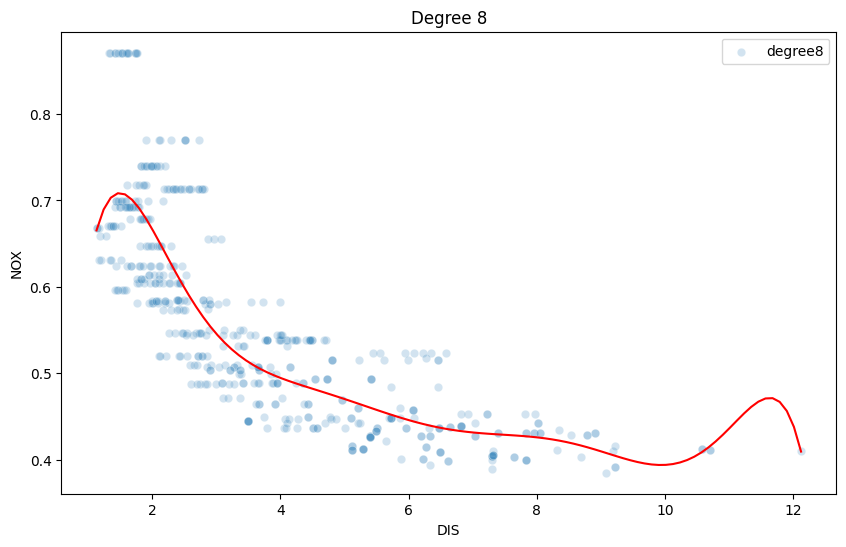

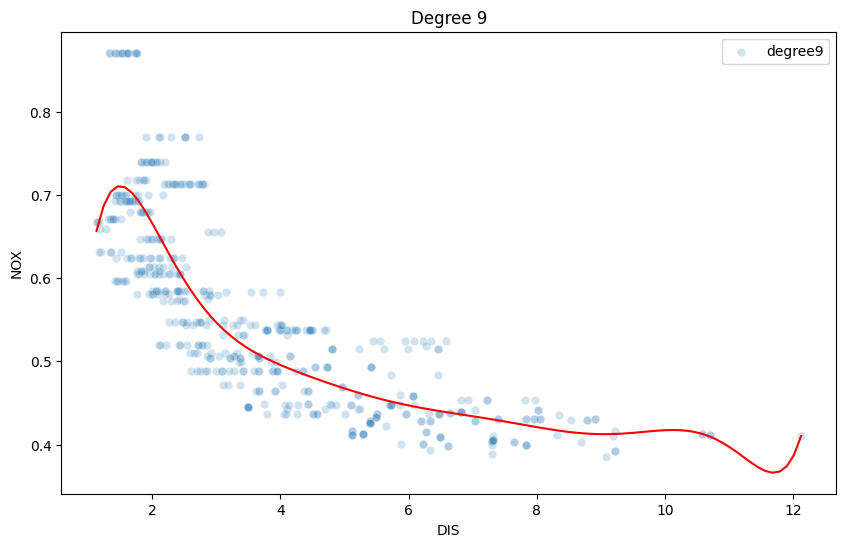

In [6]:
rss_dict = {}
for power in range(1,10):
    poly = PolynomialFeatures(power,include_bias=False)
    X_poly = poly.fit_transform(X.to_frame())

    lr = LinearRegression()
    lr.fit(X_poly,y)

    preds = lr.predict(X_poly)
    rss_dict[power] = np.round(np.sum((y - preds)**2),3)
    

    X_test = np.linspace(min(X),max(X),100)
    X_test_poly = poly.fit_transform(X_test.reshape(-1,1))
    preds_test = lr.predict(X_test_poly)

    plt.figure(figsize = (10,6))
    sns.scatterplot(x=X,y=y,alpha = 0.2,label = 'degree' + str(power))
    sns.lineplot(x=X_test,y=preds_test,color = 'r')
    plt.title('Degree ' + str(power))
   

Text(0, 0.5, 'Training RSS')

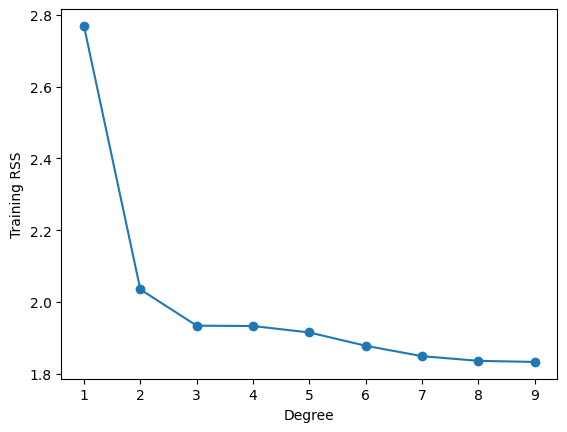

In [7]:
plt.plot(np.arange(1,10),list(rss_dict.values()),marker = 'o')
plt.xlabel('Degree')
plt.ylabel('Training RSS')

* Use the $bs()$ function to fit a regression spline to predict $nox$
using $dis$.

$bs()$ can produce B-spline bases of arbitrary degrees – e.g., degree=0 will give produce piecewise-constant functions, degree=1 will produce piecewise-linear functions, and the default degree=3 produces cubic splines.

/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- bs(DIS_test, df=4)[0]
- bs(DIS_test, df=4)[1]
- bs(DIS_test, df=4)[2]
- bs(DIS_test, df=4)[3]
Feature names seen at fit time, yet now missing:
- bs(DIS, df=4)[0]
- bs(DIS, df=4)[1]
- bs(DIS, df=4)[2]
- bs(DIS, df=4)[3]

  warnings.warn(message, FutureWarning)


Text(0.5, 1.0, 'Degree 9')

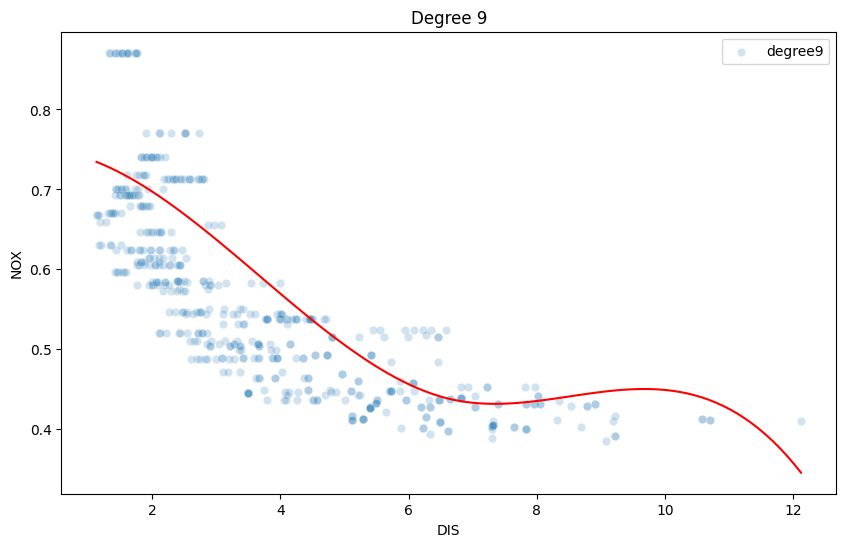

In [8]:
#using bs to get a transfomered metrix which then will be used for fitting a linear model
X_transformed = dmatrix('bs(DIS,df=4)',data = {'DIS':X},return_type = 'dataframe')


lr = LinearRegression()
lr.fit(X_transformed,y)

#choosing some test values for x axis
X_test = np.linspace(min(X),max(X),100)
X_test_transformed =  dmatrix('bs(DIS_test,df=4)',data = {'DIS_test':X_test},return_type = 'dataframe')
# X_test_transformed =  dmatrix('bs(DIS_test,df=4,degree=4)',data = {'DIS_test':X_test},return_type = 'dataframe')

#getting the predictions for test data, which wil be used for plotting the predicted spline
preds = lr.predict(X_test_transformed)

plt.figure(figsize = (10,6))
sns.scatterplot(x=X,y=y,alpha = 0.2,label = 'degree' + str(power))
sns.lineplot(x=X_test,y=preds,color = 'r')
plt.title('Degree ' + str(power))

* Now fit a regression spline for a range of degrees of freedom

In [9]:
def splines(X,y,total_dfs):
    rss_dict = {}
    for df in range(3,total_dfs+1):
        #using bs to get a transfomered metrix which then will be used for fitting a linear model
        X_transformed = dmatrix('bs(DIS,df={})'.format(df),data = {'DIS':X},return_type = 'dataframe')


        lr = LinearRegression()
        lr.fit(X_transformed,y)
        preds = lr.predict(X_transformed)
        rss = np.round(np.sum((y - preds)**2),3)
        rss_dict[df] = rss

        plt.figure(figsize = (10,6))
        sns.scatterplot(x=X,y=y,alpha = 0.2,label = 'degree' + str(power))
        sns.lineplot(x=X,y=preds,color = 'r')
        plt.title('DEGREES OF FREEDOM ' + str(df))
        plt.show()
    return rss_dict

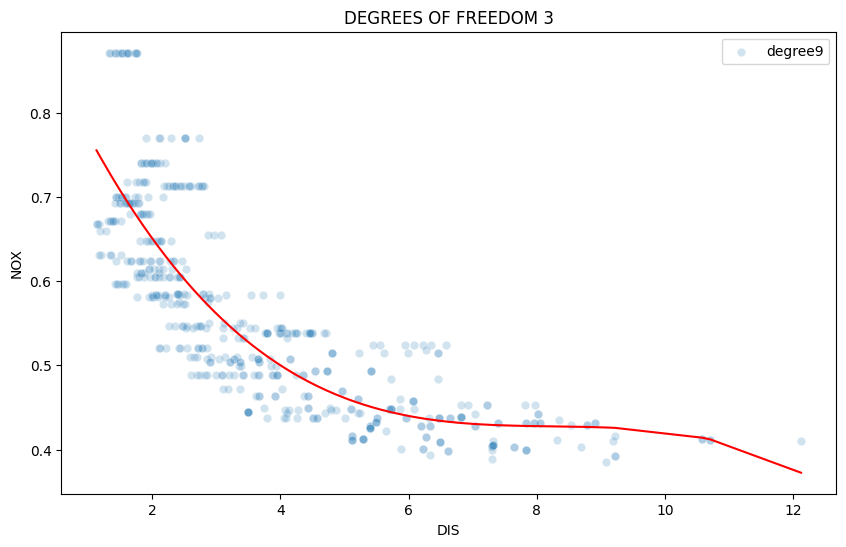

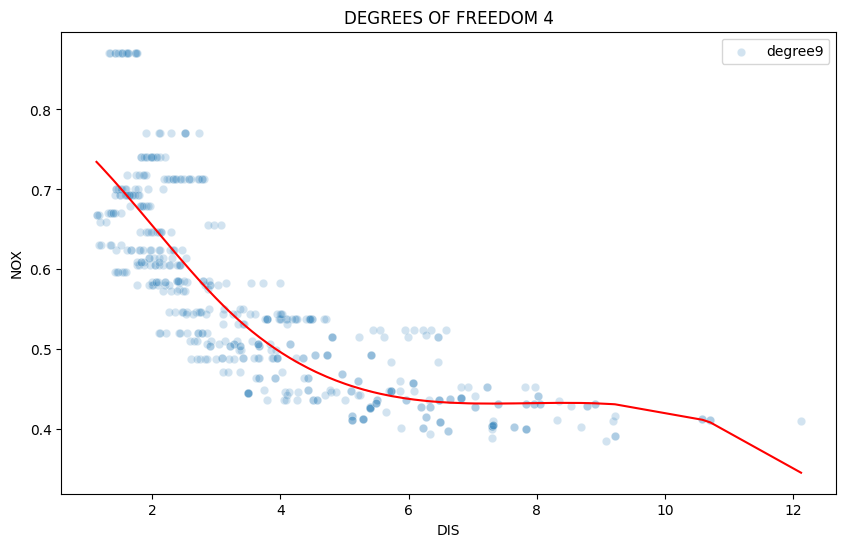

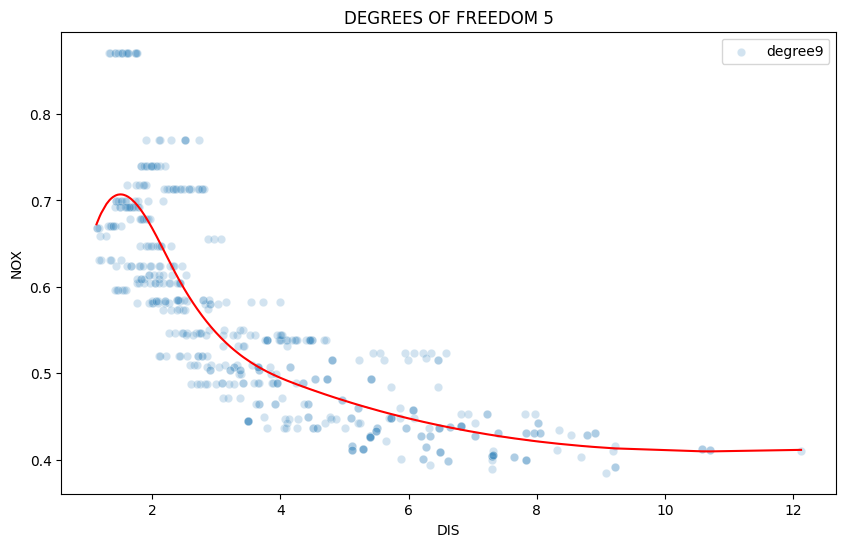

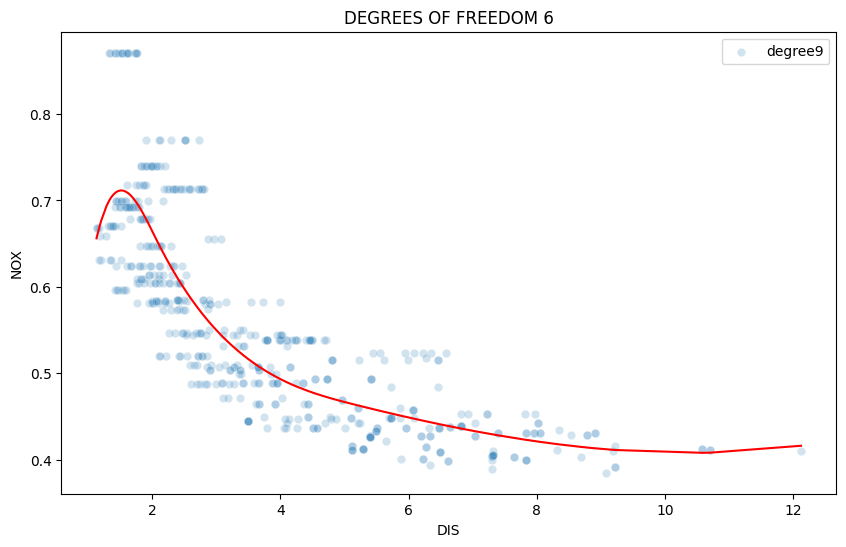

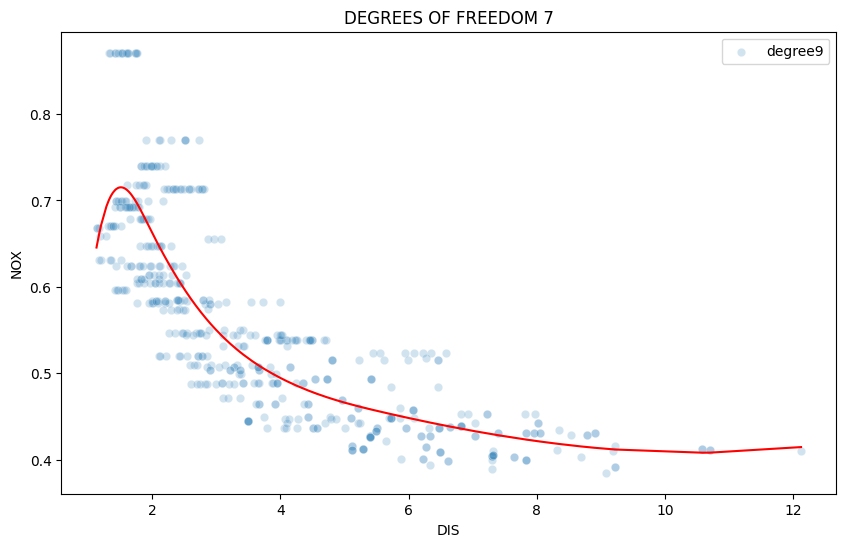

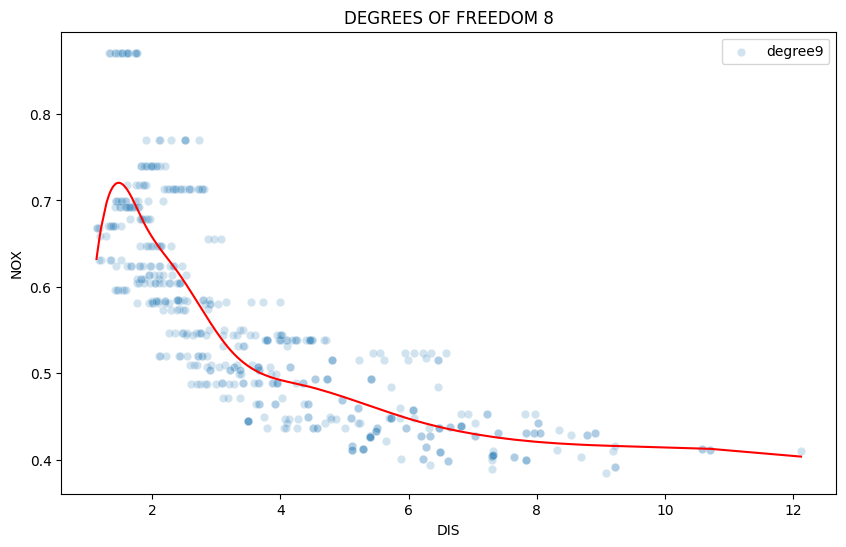

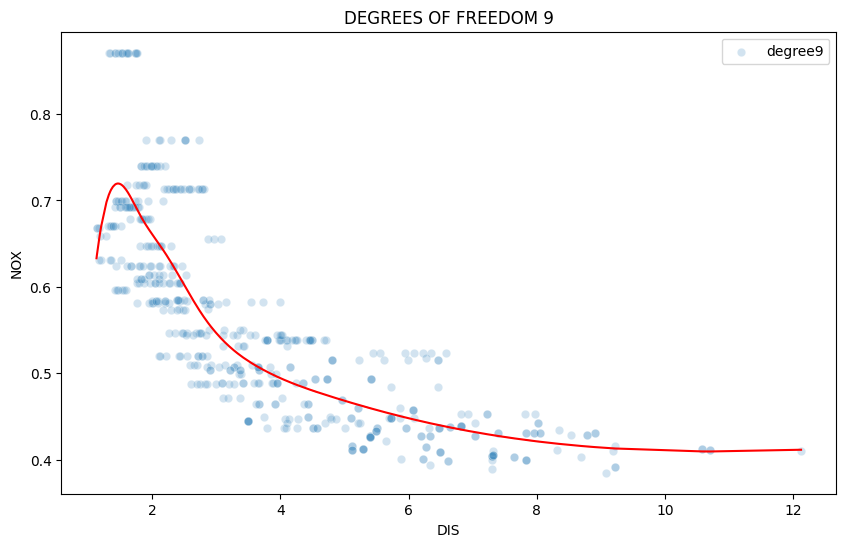

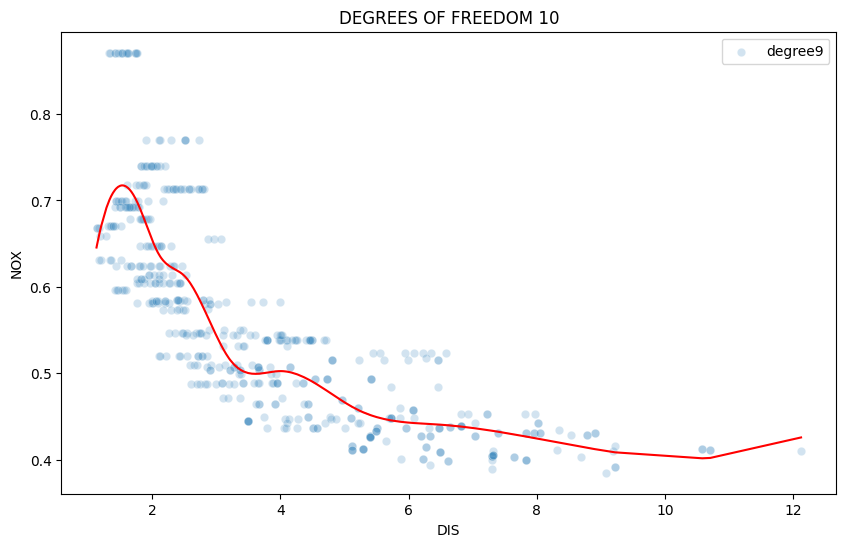

In [10]:

scores_splines = splines(X,y,10)

Text(0, 0.5, 'RSS')

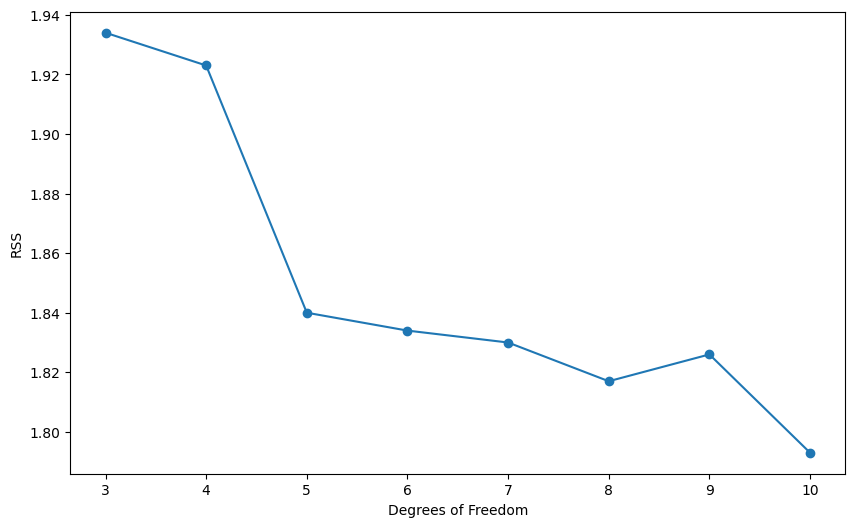

In [11]:
plt.figure(figsize = (10,6))
plt.plot(np.arange(3,11),list(scores_splines.values()),marker = 'o')
plt.xlabel('Degrees of Freedom')
plt.ylabel('RSS')